## **KNN**

### **Installing Depedencies**

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statistics import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### **Importing Dataset**

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=2, hypercube=False, class_sep=20)

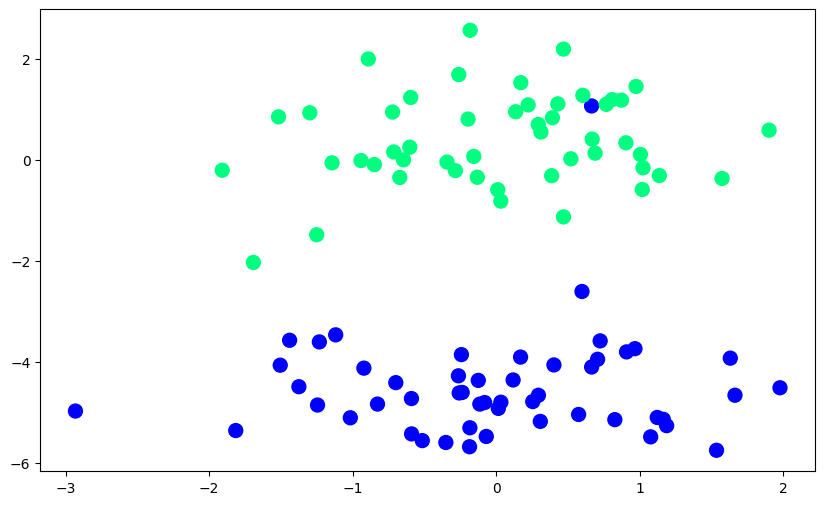

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

### **KNN**

In [5]:
class KNN:
    def __init__(self, n_neighbours: int = 5) -> None:
        self.n_neighbours: int = n_neighbours
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train) -> None:
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test) -> list[int]:
        pred_labels: list = []
        for data_point in X_test:
            distances: list[tuple[int, float]] = sorted(list(enumerate(
                np.linalg.norm(X_train - data_point, axis=1))), key=lambda x: x[1])[:self.n_neighbours]
            pred_idx: list[int] = [data_idx for (
                data_idx, distance) in distances]

            pred_labels.append(mode(self.y_train[pred_idx]))

        return pred_labels

In [6]:
my_knn = KNN()
my_knn.fit(X_train, y_train)
my_pred = my_knn.predict(X_test)
accuracy_score(y_test, my_pred)

1.0

In [7]:
my_pred

[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1]

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score(y_test, pred)

1.0